# 🌸  Day 2 Challenge 
* 📦 Dataset:
    - Iris Dataset
* Load from:
    - https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Task- Q1: What is the average sepal_length for each species?

In [20]:
avg_sepal_len_for_species = df.groupby('species')['sepal_length'].mean()
avg_sepal_len_for_species

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

# Q2: Which species has the highest average petal_width?

In [29]:
avg_petal_width_for_species = df.groupby('species')['petal_width'].mean()
avg_petal_width_for_species

species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64

In [36]:
max_species = avg_petal_width_for_species.idxmax()
max_species

'virginica'

In [38]:
max_value = avg_petal_width_for_species.max()
max_value

2.026

In [48]:
print(f"The species with the highest average petal width is '{max_species}' with a value of {max_value}.")

The species with the highest average petal width is 'virginica' with a value of 2.026.


# Q3: Create a new column sepal_area as sepal_length * sepal_width. What is the max sepal_area per species?

In [53]:
df['sepal_area'] = df['sepal_length'] * df['sepal_width']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00


In [58]:
max_sepal_area_for_species = df.groupby('species')['sepal_area'].max()
max_sepal_area_for_species

species
setosa        25.08
versicolor    22.40
virginica     30.02
Name: sepal_area, dtype: float64

In [60]:
max_area = max_sepal_area_for_species.max()
max_area

30.02

In [62]:
max_area_species = max_sepal_area_for_species.idxmax()
max_area_species

'virginica'

In [64]:
print(f"The max sepal_area per species is {max_area} of '{max_area_species}'.")

The max sepal_area per species is 30.02 of 'virginica'.


# 1.Create a boxplot of petal_length grouped by species.

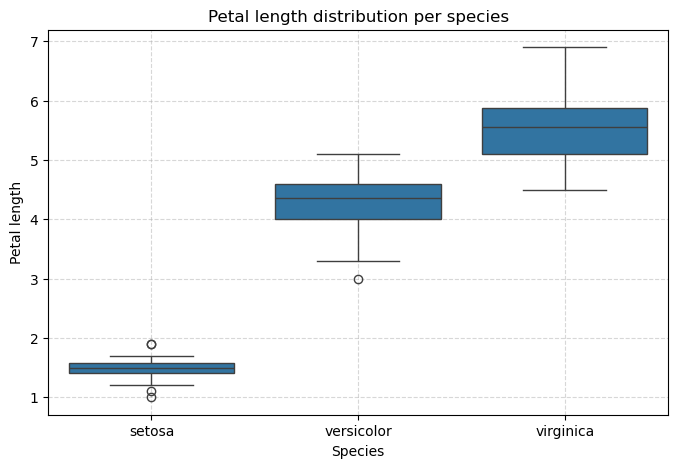

In [95]:
plt.figure(figsize = (8,5))
sns.boxplot(x = 'species', y = 'petal_length', data = df)
plt.title("Petal length distribution per species")
plt.xlabel("Species")
plt.ylabel("Petal length")
plt.grid(True, linestyle = "--", alpha = 0.5)
plt.show()

# 2.Make a scatter plot of sepal_length vs petal_length, colored by species.

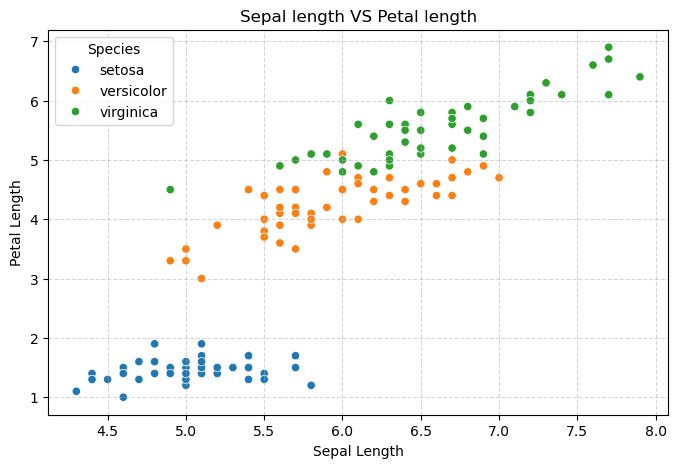

In [104]:
plt.figure(figsize = (8,5))
sns.scatterplot(x = 'sepal_length', y = 'petal_length', hue = 'species', data = df)
plt.title("Sepal length VS Petal length")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend(title = 'Species')
plt.grid(True, linestyle = "--", alpha = 0.5)
plt.show()

# 3. Plot a histogram of sepal_width with 20 bins.

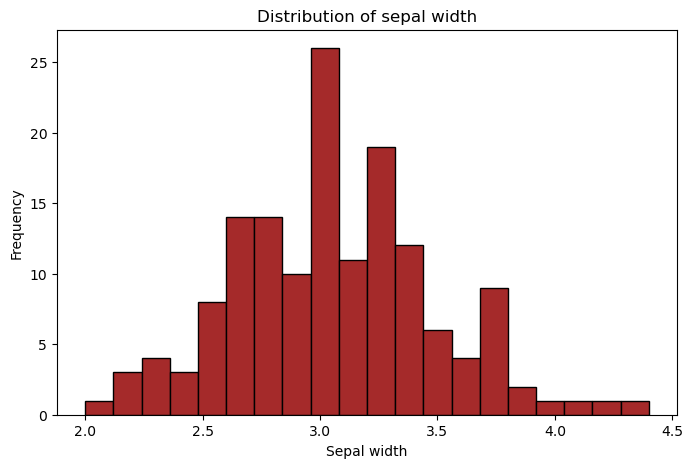

In [111]:
plt.figure(figsize = (8, 5))
plt.hist(df['sepal_width'], bins = 20, color = 'brown', edgecolor = 'black')
plt.title("Distribution of sepal width")
plt.xlabel("Sepal width")
plt.ylabel("Frequency")
plt.show()

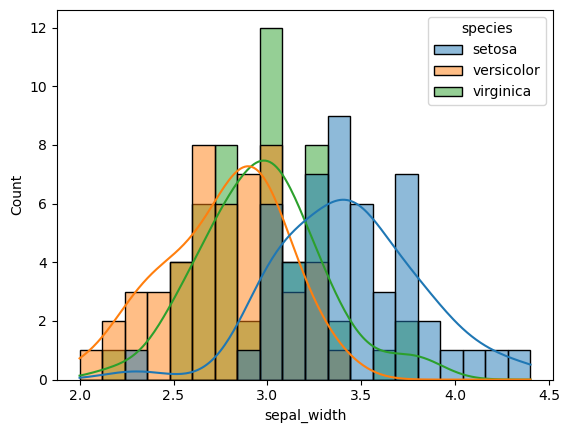

In [113]:
sns.histplot(data=df, x='sepal_width', hue='species', bins=20, kde=True)
plt.show()

# Q1: How many samples are there for each species?

In [118]:
samples_per_species = df['species'].value_counts()
samples_per_species

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

# Q2: Which feature has the highest variance overall?

In [135]:
variance_ = df.var(numeric_only = True)
print(f"The highest variance is of column '{variance_.idxmax()}' with {round(variance_.max(),4)}")

The highest variance is of column 'sepal_area' with 11.3021


# Q3: Find all samples where petal_length > sepal_length. How many such samples exist?

In [148]:
cond = df['petal_length']> df['sepal_length']
filtered_df = df[cond]
count = filtered_df.shape[0]
print("Number of samples where petal_length > sepal_length:", count)

Number of samples where petal_length > sepal_length: 0


# Statistics

# 1. Calculate the variance of petal_width.

In [160]:
print(f"The variance of petal_width is {round(df['petal_width'].var(),4)}")

The variance of petal_width is 0.581


# 2. Find the skewness of the sepal_length distribution.

In [167]:
round(df['sepal_length'].skew(),4)

0.3149

# 3. Compute the 75th percentile of petal_length.

In [170]:
df['petal_length'].quantile(0.75)

5.1